# The Perceptron

Based on a simple (the simplest) nerual net.

![http://i.stack.imgur.com/KUvpQ.png](http://i.stack.imgur.com/KUvpQ.png)


$h(x) = sign((\sum{w_ix_i}) - threshold)$

Can simplify by adding an artificial coordinate $x_0$ and $w_0$  where $x_0 = 1$ 

This makes it easy

$h(x) = sign(\sum{w_ix_i})$

or in vector notation

$h(x) = sign(w \cdot x)$



## So, how is this a learning system?

We need a learning algorithm

Supervised Learning requires a training set where we have some data and we know the answer.

1. Given a training set of $\vec x,\vec y$
2. Classify all of the points in $\vec x$
3. Pick a point $n$ from $\vec x$ that was misclassified
4. update the weight vector $\vec w$ using: $\vec w = \vec w + y_n \vec w_n$

Repeat 2 -- 4 until all points are classified correctly.  OR at some upper limit of iteration.


See https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/ for a nice writeup.

In [1]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt

#ts = [np.array([1,5,10]), np.array([1,3,11]), np.array([1,7,10]), np.array([1,2,3]), np.array([1,6,2]),np.array([1,1,1])]
#cls = [1,1,1,-1,-1,-1]
#ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9])]
#cls = [1,1,1,-1]
ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),
      np.array([1,.4,.5]),np.array([1,.2,.35]),np.array([1,.25,.2]),
      np.array([1,.1,.3]),np.array([1,.4,.4]),np.array([1,.43,.42]),
      
      np.array([1,.6,.6]),np.array([1,.9,.58]),np.array([1,.5,.67]),
      np.array([1,.7,.56]),np.array([1,.7,.5]),np.array([1,.8,.9]),
      np.array([1,.8,.9]),np.array([1,.76,.58]),np.array([1,.79,.42])]
      
cls = [1,1,1,-1,1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1]
w = np.array([1,1,1])


[ 1.   -1.26 -0.56]


/Users/Grant/Documents/2015_Fall/machine_learning/jupyter/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


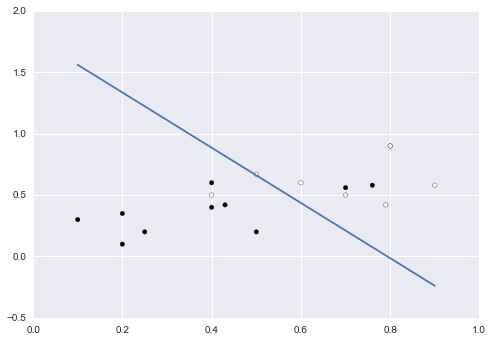

In [2]:
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets

class Perceptron:
    def __init__(self,ts,tc):
        self.training_set = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
        
    def classify(self,x):
        return np.sign(np.dot(x,self.weights))
    
    def learn(self,limit=10000):
        done = False
        count = 0
        minamount = 100

        while not done and count < limit:
            count += 1
            self.correct = []
            self.incorrect = []
            # first classify all points
            for ix,i in enumerate(self.training_set):
                if self.classify(i) == self.classes[ix]:
                    self.correct.append(ix)
                else:
                    self.incorrect.append(ix)

            if len(self.incorrect) == 0:
                print("Done!",self.weights)
                done = True
            else:
                if len(self.incorrect) < minamount:
                    minamount = len(self.incorrect)
                    best = self.weights
                p = random.randrange(len(self.incorrect))
                y = self.training_set[self.incorrect[p]]
                self.weights = self.weights + y*self.classes[self.incorrect[p]]
                #print(len(self.incorrect), self.weights)
        if not done:
            self.weights = best
        print(self.weights)
        self.plot()
        
        
    def plot(self):
        cols = []
        xvals = list(map(lambda x: x[1], self.training_set))
        #cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals,list(map(lambda x: x[2],self.training_set)),c=self.classes)
        slope, intcpt = -self.weights[1]/self.weights[2], -self.weights[0]/self.weights[2]
        xvals = np.linspace(min(xvals),max(xvals))
        plt.plot(xvals,slope*xvals+intcpt)

p = Perceptron(ts,cls)
p.learn()
#interact(p.learn,limit=widgets.widget_int.IntSlider(min=0,max=10,step=1,value=1))

        




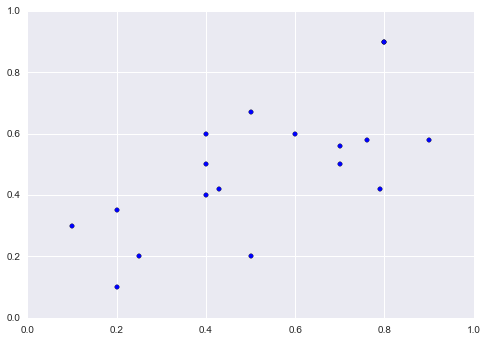

In [3]:
plt.scatter(list(map(lambda x: x[1],ts)),list(map(lambda x: x[2],ts)))

### Lets look at a classic dataset in machine learning.  The iris dataset

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Since we only can do a binary classification right now, lets look at setosa versus virginica


In [4]:
df = pd.read_csv('iris.csv',header=None)
df.columns = ['sepallen','sepalwidth','petallen','petalwidth','kind']

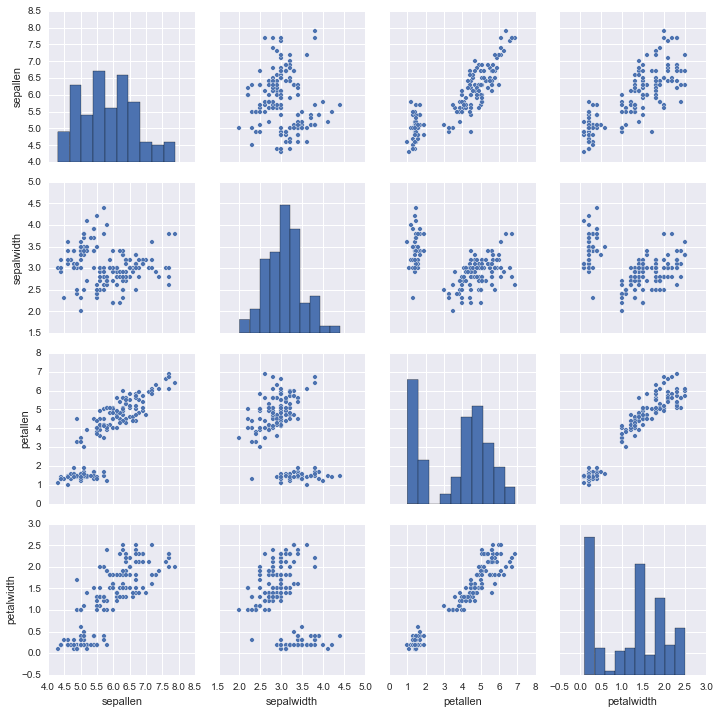

In [5]:
c = df[(df.kind == 'Iris-setosa') | (df.kind == 'Iris-virginica') | (df.kind == 'Iris-versicolor')]
sbn.pairplot(c[['sepallen','sepalwidth','petallen','petalwidth']])

In [6]:

cls = []
for x in c['kind']:
    if x == "Iris-setosa":
        cls.append(1)
    else:
        cls.append(-1)

p = Perceptron((c[['sepallen','sepalwidth','petallen','petalwidth']]).values,cls)

Done! [ 0.1  2.  -2.9 -0.4]
[ 0.1  2.  -2.9 -0.4]


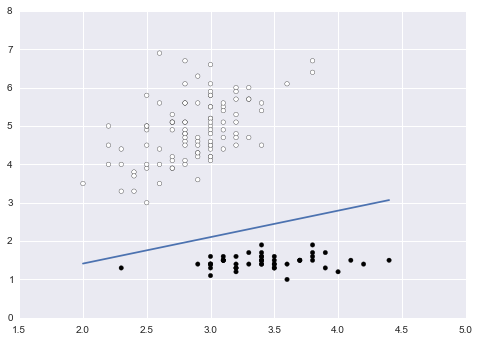

In [7]:
p.learn()

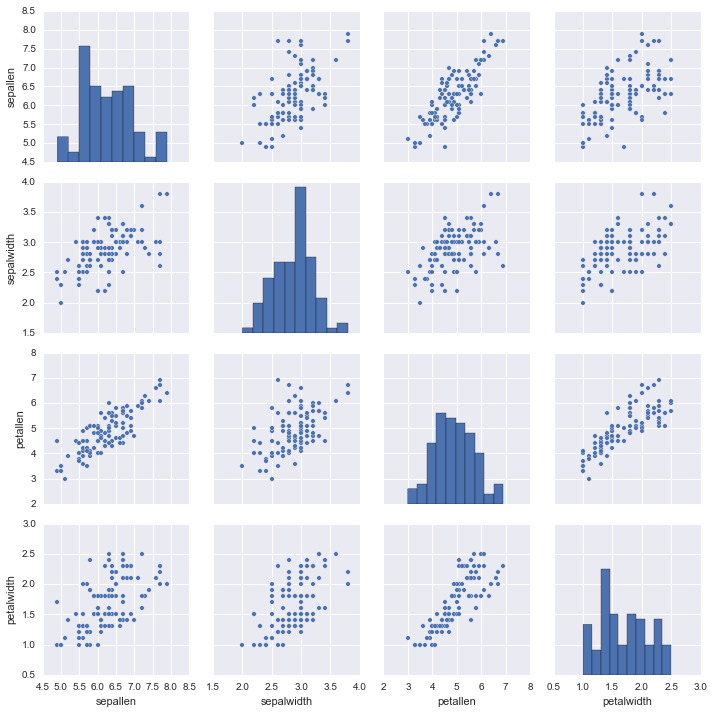

In [8]:
c = df[(df.kind == 'Iris-versicolor') | (df.kind == 'Iris-virginica')]
sbn.pairplot(c[['sepallen','sepalwidth','petallen','petalwidth']])

#c[['sepallen','sepalwidth','petallen','petalwidth']]

In [9]:
cls = []
for x in c['kind']:
    if x == "Iris-virginica":
        cls.append(1)
    else:
        cls.append(-1)


p = Perceptron((c[['sepallen','sepalwidth','petallen','petalwidth']]).values,cls)

[-18.7 -16.1  25.6  21.7]


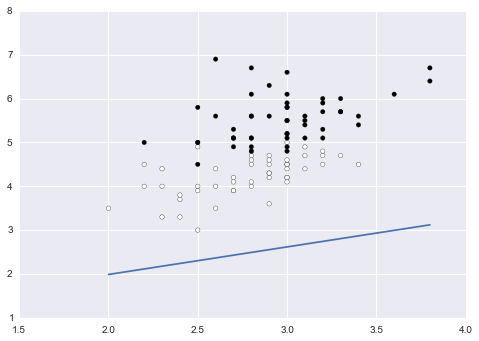

In [10]:
p.learn()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# Result Found From Perceptron

To determine if it is an Iris-setosa or not, take the dot product of ['sepallen','sepalwidth','petallen','petalwidth'] with [0.1, 2, -2.9, -0.4].  If the result is greater than 0, then it is an Iris-setosa, if the value is less than zero, then it is not.

If not an Iris-setoas, then to tell if it is an 'Iris-versicolor' or an 'Iris-virginica', take the dot product of ['sepallen','sepalwidth','petallen','petalwidth'] with [-18.7, -16.1, 25.6, 21.7].  If the result is greater than 0, then it is an Iris-virginica, if the result is less than zero, then it is an Iris-versicolor.

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

### Lets try

Conver this into something we can use with our simple perceptron learning algorithm and see if it works.


### Lets look at a more interesting dataset

Predicting the incidence of diabetes in the Pima Indian population  using the `pima-indians-diabetes.data` file.

The columns of the file are as follows:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)



In [11]:
df = pd.read_csv('../Data/pima-indians-diabetes.data',header=None)
df.columns = ['ntp','glucose','bp','tsft','insulin','bmi','dpf','age','class']

OSError: File b'../Data/pima-indians-diabetes.data' does not exist

In [ ]:
df.head()

In [ ]:
sbn.pairplot(df[['glucose','bp','bmi','age','insulin']])